In [1]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

In [73]:

# .to_list()
tickers = pd.read_csv("constituents.csv")['Symbol']
tickers = tickers.sample(30).to_list()

In [74]:

benchmark = yf.download("^GSPC", start = "2010-01-04", progress=False)['Close']


In [75]:

# , 'Equal-Weight'

total_recs = ['Buy', 'Outperform', 'Overweight', 'Sector Perform', 'Neutral', 'Sector Outperform', 
              'Hold', 'Market Perform', 'Strong Buy', 'Long-term Buy', 'Sell', 
              'Market Outperform', 'Positive', 
              'Long-Term Buy', 'Equal-weight', 'Perform', 'Negative', 'Reduce', 'Underweight', 
              'Underperform', 'Sector Weight', 'Peer Perform']


In [76]:


all_recs = {grade.lower() : [] for grade in total_recs}

for num, tick in enumerate(tickers):
    
    print(num)
    
    data = yf.download(tick, start = "2010-01-04", progress=False)['Close']

    ticker = yf.Ticker(tick)
    recs = ticker.get_recommendations()
    
    recs = recs.reset_index()
    data = data.reset_index()

    #rets = {grade : [] for grade in recs['To Grade'].unique()}

    for d, grade in zip(recs.index, recs['To Grade']):
        
        #print(recs['From Grade'].loc[d])
        if grade in total_recs and grade != recs['From Grade'].loc[d]:
            
            date = recs.Date.loc[d]
            
            # pd.to_datetime(f"{date.year}-{date.month}-{date.day}")
            
            new_point = data.loc[data.Date == date]
            i = 1
            while len(new_point) == 0:
                
                new_d = date + datetime.timedelta(days = i)
                new_point = data.loc[data.Date == pd.to_datetime(f"{new_d.year}-{new_d.month}-{new_d.day}")]
                i += 1
            
            if new_point.index+30 < len(data):
                
                ret = (data["Close"].iloc[new_point.index+30].values[0] / new_point["Close"].values[0]) - 1
                
                benchmark_ret = (benchmark.iloc[new_point.index+30].values[0] / benchmark.iloc[new_point.index].values[0]) - 1
                
                # (data["Close"].iloc[new_point.index+30].values[0] / new_point["Close"].values[0]) - 1
                all_recs[grade.lower()].append(ret - benchmark_ret)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [77]:


all_recs



{'buy': [0.00022937577448645108,
  -0.009113101427763337,
  0.019871991886503126,
  0.0220693566436152,
  -0.08793090297797967,
  0.04670883951702276,
  -0.023437514724017006,
  0.030767476124148874,
  0.028287900503352392,
  0.07440943754377072,
  -0.08560801596024947,
  -8.06262680133063e-05,
  0.09569193857282055,
  0.052643390806175416,
  -0.04956240739364004,
  0.0078034219677010075,
  0.03971921297366188,
  0.04101938316520337,
  0.044366799227687936,
  -0.07455051183335537,
  -0.07455051183335537,
  -0.06300215117417796,
  0.0024698515881658167,
  -0.15184778866641802,
  -0.19198132342998186,
  -0.015308337012553741,
  -0.04990609631016629,
  0.026219763943965857,
  -0.0162841558625062,
  -0.04020222004030605,
  0.029952751438917957,
  0.05953809256268405,
  -0.03155019714756613,
  -0.03155019714756613,
  0.054659275409659314,
  0.03598197818944482,
  0.005637875022636685,
  -0.06324793111569471,
  0.11322456301142303,
  0.04546274947597606,
  -0.07185981388799545,
  0.147801530

In [59]:

### SCRATCH WORK ###

tick = "AAPL"

data = yf.download(tick, start = "2010-01-04", progress=False)['Close']

ticker = yf.Ticker(tick)

recs = ticker.get_recommendations()
recs = recs.reset_index()
data = data.reset_index()


rets = {grade : [] for grade in recs['To Grade'].unique()}


'''
for d, grade in zip(recs.index, recs['To Grade']):
    
    if grade != recs['From Grade'].loc[d]:
        
        new_point = data.loc[data.Date == pd.to_datetime(f"{d.year}-{d.month}-{d.day}")]
        i = 1
        while len(new_point) == 0:
            new_d = d + datetime.timedelta(days = i)
            new_point = data.loc[data.Date == pd.to_datetime(f"{new_d.year}-{new_d.month}-{new_d.day}")]
            i += 1
        
        if new_point.index+60 < len(data):
            rets[grade].append((data["Close"].iloc[new_point.index+60].values[0] / new_point["Close"].values[0]) - 1)

'''


recs





,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09,Canaccord Genuity,Buy,,main
2012-03-08,FBN Securities,Outperform,,main
2012-03-13,Jefferies,Buy,,main
2012-03-14,Morgan Stanley,Overweight,,main
2012-03-14,Oxen Group,Buy,,init
...,...,...,...,...
2022-04-29,Deutsche Bank,Buy,,main
2022-04-29,Morgan Stanley,Overweight,,main
2022-04-29,JP Morgan,Overweight,,main


In [78]:

mean_all_recs = {}

for rec in all_recs:
    
    if len(all_recs[rec]) != 0:
        #print(rec)
        mean_all_recs[rec] = np.mean(all_recs[rec])



In [79]:


returns_per_recommendation_type = pd.DataFrame(mean_all_recs, index = ['Mean Return']).T



<BarContainer object of 20 artists>

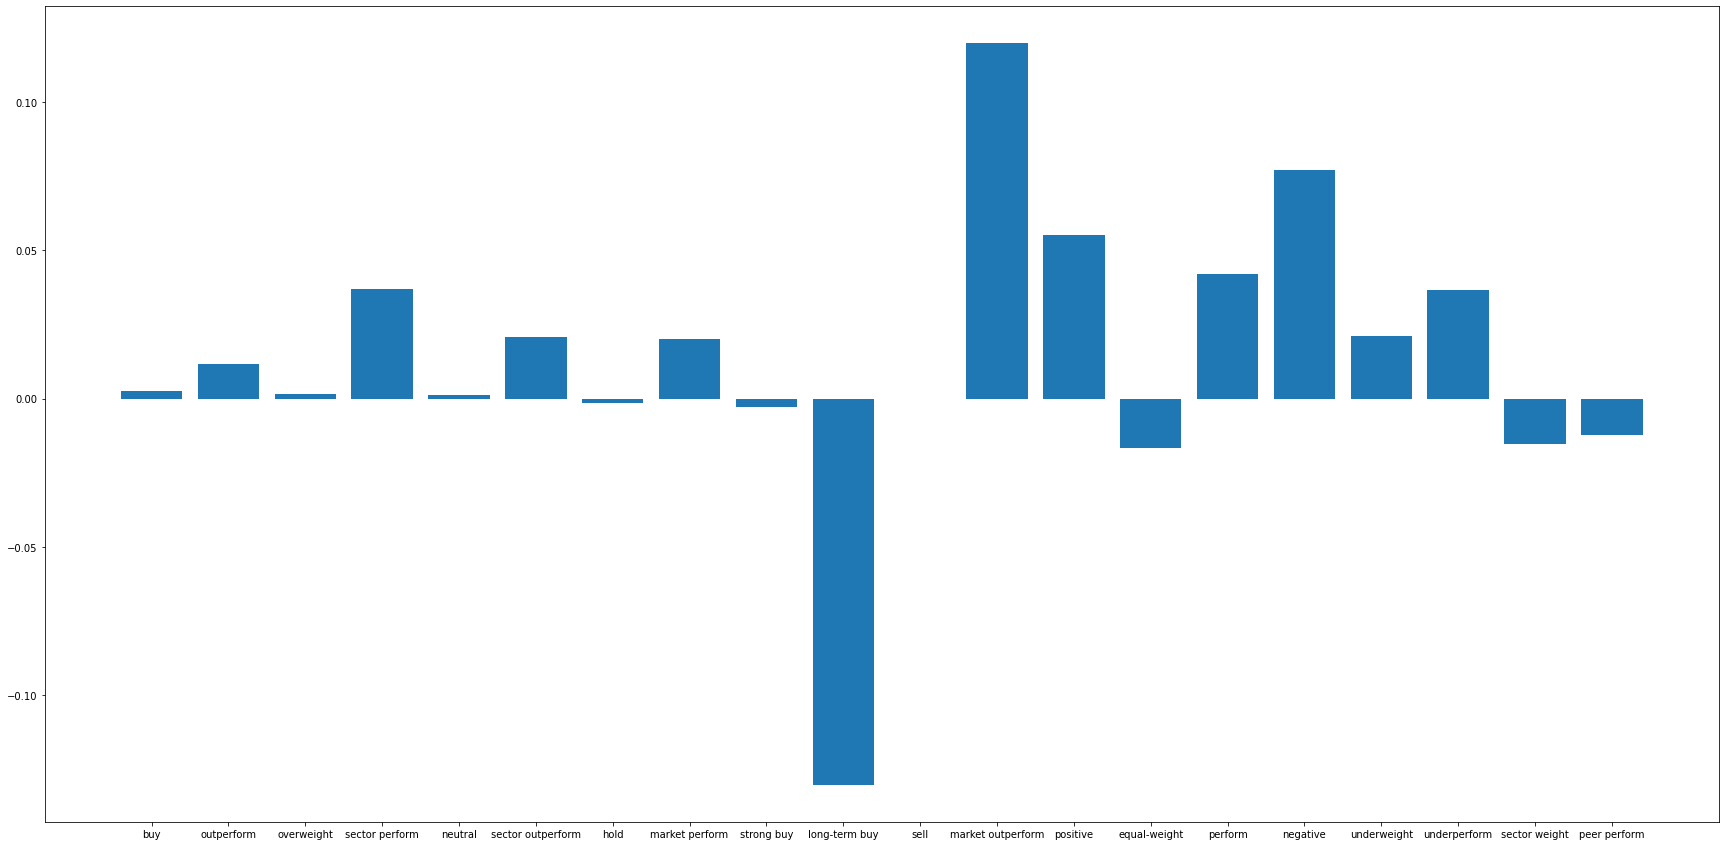

In [80]:
import matplotlib.pyplot as plt


plt.figure(figsize = (30,15))
plt.bar(returns_per_recommendation_type.index, returns_per_recommendation_type['Mean Return'])
#plt.tick_params(size = 25)


In [82]:


returns_per_recommendation_type['Mean Return'].sort_values()


long-term buy       -0.130265
equal-weight        -0.016499
sector weight       -0.015413
peer perform        -0.012117
strong buy          -0.002708
hold                -0.001611
sell                -0.000298
neutral              0.001380
overweight           0.001532
buy                  0.002413
outperform           0.011798
market perform       0.020172
sector outperform    0.020727
underweight          0.021176
underperform         0.036488
sector perform       0.036862
perform              0.041989
positive             0.055237
negative             0.077027
market outperform    0.119809
Name: Mean Return, dtype: float64

In [70]:



data.loc[data.Date == pd.to_datetime(f"{new_d.year}-{new_d.month}-{new_d.day}")].index



Int64Index([1594], dtype='int64')